# Telecom Customer Churn Dataset Analysis

## About Company
TeleConnect is a comprehensive telecommunications service provider offering a wide range of communication solutions to residential and business customers. Their service portfolio includes:

- **Phone Services**: Basic telephone connections and premium multiple-line options
- **Internet Services**: Various connectivity options including DSL and high-speed Fiber optic connections
- **Security Services**: Online security solutions to protect customer data and privacy
- **Backup Services**: Online backup solutions for customer data protection
- **Technical Support**: Various tiers of customer support for technical issues
- **Entertainment Services**: Streaming TV and movie services for home entertainment
- **Device Protection**: Insurance and protection plans for customer devices

The company offers flexible contract terms (month-to-month, one-year, or two-year commitments) and multiple payment and billing options to meet diverse customer needs.

## Dataset Overview
This dataset contains information about telecommunications customers and tracks whether they've churned (cancelled their service) or remained with the company.

## Features
- **customerID**: Unique identifier for each customer
- **gender**: Whether the customer is Male or Female
- **SeniorCitizen**: Whether the customer is a senior citizen (1) or not (0)
- **Partner**: Whether the customer has a partner (Yes/No)
- **Dependents**: Whether the customer has dependents (Yes/No)
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has phone service (Yes/No)
- **MultipleLines**: Whether the customer has multiple lines (Yes/No/No phone service)
- **InternetService**: Customer's internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity**: Whether the customer has online security (Yes/No/No internet service)
- **OnlineBackup**: Whether the customer has online backup (Yes/No/No internet service)
- **DeviceProtection**: Whether the customer has device protection (Yes/No/No internet service)
- **TechSupport**: Whether the customer has tech support (Yes/No/No internet service)
- **StreamingTV**: Whether the customer has streaming TV (Yes/No/No internet service)
- **StreamingMovies**: Whether the customer has streaming movies (Yes/No/No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer has paperless billing (Yes/No)
- **PaymentMethod**: The customer's payment method (Electronic check, Mailed check, Bank transfer, Credit card)
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Whether the customer churned (Yes) or not (No)

## Problem Statement
This telecommunications company is experiencing customer churn and wants to identify the key factors that lead to customers cancelling their services. The company aims to develop a predictive model that can accurately identify customers who are likely to churn in the near future, allowing them to implement targeted retention strategies before these customers leave.

## Purpose
To develop predictive models that can identify customers at risk of churning, allowing this company to take proactive retention measures.

## Hypothesis
1. **Contract Type Hypothesis**: Customers with month-to-month contracts are more likely to churn than those with longer-term contracts.
2. **Service Quality Hypothesis**: Customers without add-on services like OnlineSecurity, TechSupport, or OnlineBackup experience higher churn rates due to potential service issues.
3. **Pricing Hypothesis**: Higher monthly charges correlate with increased churn rates as customers seek more cost-effective alternatives.
4. **Tenure Hypothesis**: New customers (low tenure) are more likely to churn than long-term customers who have developed loyalty.
5. **Internet Service Hypothesis**: Fiber optic internet service customers have different churn patterns compared to DSL customers.
6. **Payment Method Hypothesis**: Customers using electronic payment methods may have different churn behavior than those using traditional methods.

# Imports And Loading Data

In [357]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE


In [235]:
# Get current notebook directory
notebook_path = Path().resolve()

# Build path to the CSV file in the Source folder
csv_path = notebook_path.parent / "data" / "telco_churn.csv"

# Load the dataset
df = pd.read_csv(csv_path)

# Data Understanding

## Display Data

In [236]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Information

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Preparation

## Mapping Categorical Data

In [238]:
_map = df['gender'].unique()
df['gender'] = df['gender'].map({_map[0]: 1, _map[1]: 0}) # Male: 0 and Female : 1

_map= df['Partner'].unique()
df['Partner'] = df['Partner'].map({_map[0]: 1, _map[1]: 0}) # Yes: 1 and No: 0

_map= df['Dependents'].unique()
df['Dependents'] = df['Dependents'].map({_map[0]: 0, _map[1]: 1}) # Yes: 1 and No: 0

_map= df['PhoneService'].unique()
df['PhoneService'] = df['PhoneService'].map({_map[0]: 0, _map[1]: 1}) # Yes: 1 and No: 0

_map= df['TechSupport'].unique()
df['TechSupport'] = df['TechSupport'].map({_map[0]: 0, _map[1]: 1, _map[2]: 2}) # Yes: 1 and No: 0 and No internet service: 2

_map= df['MultipleLines'].unique()
df['MultipleLines'] = df['MultipleLines'].map({_map[0]: 2, _map[1]: 0, _map[2]: 1}) # 'No phone service: 2', 'No:0', 'Yes:1'

_map= df['InternetService'].unique()
df['InternetService'] = df['InternetService'].map({_map[0]: 1, _map[1]: 2, _map[2]: 0}) # 'DSL: 1', 'Fiber optic: 2', 'No: 0'

_map= df['OnlineSecurity'].unique()
df['OnlineSecurity'] = df['OnlineSecurity'].map({_map[0]: 0, _map[1]: 1, _map[2]: 2}) # 'No: 0', 'Yes: 1', 'No internet service: 2'

_map= df['OnlineBackup'].unique()
df['OnlineBackup'] = df['OnlineBackup'].map({_map[0]: 1, _map[1]: 0, _map[2]: 2}) # Yes: 1 and No: 0 and no internet service: 2

_map= df['DeviceProtection'].unique()
df['DeviceProtection'] = df['DeviceProtection'].map({_map[0]: 0, _map[1]: 1, _map[2]: 2}) # 'No: 0', 'Yes: 1', 'No internet service: 2'

_map= df['StreamingTV'].unique()
df['StreamingTV'] = df['StreamingTV'].map({_map[0]: 0, _map[1]: 1, _map[2]: 2}) # 'No: 0', 'Yes: 1', 'No internet service: 2'

_map= df['StreamingMovies'].unique()
df['StreamingMovies'] = df['StreamingMovies'].map({_map[0]: 0, _map[1]: 1, _map[2]: 2}) # 'No: 0', 'Yes: 1', 'No internet service: 2'

_map= df['Contract'].unique()
df['Contract'] = df['Contract'].map({_map[0]: 0, _map[1]: 1, _map[2]: 2}) # 'Month-to-month: 2', 'One year: 1', 'Two year: 0'

_map= df['PaperlessBilling'].unique()
df['PaperlessBilling'] = df['PaperlessBilling'].map({_map[0]: 1, _map[1]: 0}) # Yes: 1 and No: 0

_map= df['PaymentMethod'].unique()
df['PaymentMethod'] = df['PaymentMethod'].map({_map[0]: 1, _map[1]: 0, _map[2]: 3, _map[3]: 3}) 
# 'Electronic check: 0', 'Mailed check:1', 'Bank transfer (automatic):2', 'Credit card (automatic):3'

_map= df['Churn'].unique()
df['Churn'] = df['Churn'].map({_map[0]: 0, _map[1]: 1}) # Yes: 1 and No: 0


## Converting object types with numerical values to float

In [239]:
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True) # Replacing empty strings with NaN values

df['TotalCharges'] = df['TotalCharges'].astype(float)


### Checking Dataset Post Dtype changes

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


## Null Checks

In [241]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Dropping All Rows With Null Values

In [242]:
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Dropping Customer ID Column

In [243]:
# Drop customerID (not useful for prediction)
df = df.drop('customerID', axis=1)

# Exploratory Data Analysis

## Bivariate Analysis

## Correlation Checking Among Mapped Data 

In [244]:
correlation_matrix = df.corr().abs()
correlation_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001819,0.001379,0.010349,0.005285,0.007515,0.000084,0.009643,0.004365,0.002978,0.004526,0.000057,0.000578,0.001339,0.000095,0.011902,0.013955,0.013779,0.000048,0.008545
SeniorCitizen,0.001819,1.000000,0.016957,0.210550,0.015683,0.008392,0.100120,0.259030,0.210546,0.152380,0.156700,0.223438,0.129721,0.120658,0.141820,0.156258,0.024605,0.219874,0.102411,0.150541
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.090774,0.000938,0.081078,0.086346,0.093391,0.068277,0.079066,0.075310,0.294094,0.013957,0.160818,0.097825,0.319072,0.149982
Dependents,0.010349,0.210550,0.452269,1.000000,0.163386,0.001078,0.017333,0.177789,0.188889,0.160845,0.154819,0.179176,0.138809,0.125086,0.240556,0.110131,0.056093,0.112343,0.064653,0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.243214,0.031272,0.147575,0.180896,0.180895,0.146727,0.138208,0.142143,0.676734,0.004823,0.393418,0.246862,0.825880,0.354049
PhoneService,0.007515,0.008392,0.018397,0.001078,0.007877,1.000000,0.690813,0.094182,0.125544,0.149932,0.138938,0.123533,0.171773,0.164379,0.003019,0.016696,0.002422,0.248033,0.113008,0.011691
MultipleLines,0.000084,0.100120,0.090774,0.017333,0.243214,0.690813,1.000000,0.174966,0.235077,0.210051,0.200400,0.232474,0.202326,0.194858,0.078254,0.108261,0.123121,0.146127,0.251357,0.019609
InternetService,0.009643,0.259030,0.000938,0.177789,0.031272,0.094182,0.174966,1.000000,0.764510,0.685822,0.681857,0.760544,0.616993,0.619608,0.288855,0.377644,0.091274,0.905389,0.428212,0.316350
OnlineSecurity,0.004365,0.210546,0.081078,0.188889,0.147575,0.125544,0.235077,0.764510,1.000000,0.751312,0.748684,0.790951,0.701526,0.704672,0.389138,0.333656,0.016551,0.620532,0.153234,0.332443
OnlineBackup,0.002978,0.152380,0.086346,0.160845,0.180896,0.149932,0.210051,0.685822,0.751312,1.000000,0.740244,0.753752,0.720277,0.716388,0.350419,0.261565,0.005760,0.537727,0.085017,0.291047


## Correlation Heat Map

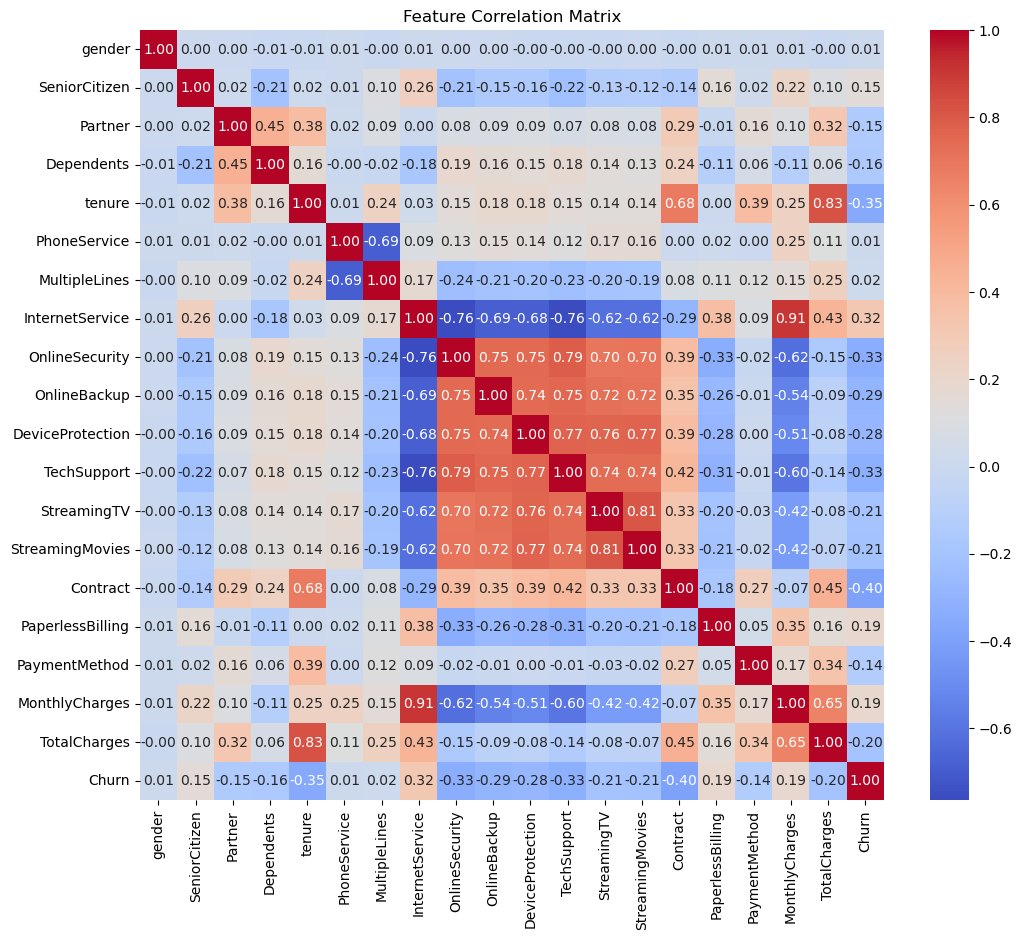

In [233]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Correlation Analysis Report

**Dataset:** Customer churn-related features  
**Objective:** Understand feature relationships, especially with respect to `Churn`

---

## Top Correlations with `Churn`

| Feature             | Correlation with `Churn` | Insight |
|---------------------|---------------------------|---------|
| **Contract**         | **-0.396**                | Strongest inverse correlation. Customers with longer contracts churn less. |
| **tenure**           | **-0.354**                | Longer customer relationships reduce likelihood of churn. |
| **OnlineSecurity**   | **-0.332**                | Security services seem to increase customer retention. |
| **TechSupport**      | **-0.329**                | Support access helps in keeping users. |
| **TotalCharges**     | **-0.199**                | Accumulated charges (proxy for tenure) indicate loyalty. |
| **StreamingServices**| ~**-0.2**                 | Streaming services (TV & Movies) mildly associated with lower churn. |
| **PaperlessBilling** | **+0.191**                | Small positive correlation – may indicate tech-savvy but price-sensitive users. |
| **InternetService**  | **+0.316**                | Higher churn among internet users (likely fiber or DSL plans). |
| **MonthlyCharges**   | **+0.193**                | Slightly more churn from high-bill customers. |

---

## Low or Negligible Correlations

| Feature             | Correlation with `Churn` |
|---------------------|---------------------------|
| `gender`            | 0.0085 (negligible)       |
| `PhoneService`      | 0.0117                    |
| `MultipleLines`     | 0.0196                    |


---

## Business Interpretation

- **Contract type** is a critical factor; shorter contracts (like month-to-month) are linked to higher churn. Retention offers or incentives could target these users.
- Customers who have **security and tech support services** are more likely to stay. These can be marketed as retention tools.
- High **monthly charges** may trigger churn; bundling discounts or value packs may help retain such users.
- **Longer tenure** means more loyalty. New customers should be nurtured during their first few months.

---

## Suggestions

1. **Build a Churn Prediction Model:**
   - Build Model using the features with correlation to the Churn Target Feature.
   - Model: Logistic Regression (Numerical Target Feature that is already known and other numerical data).

3. **Customer Segmentation:**
   - Identify groups with high `MonthlyCharges` and short `tenure` for targeted retention.

4. **Feature Engineering:**
     - `AvgMonthlyCost = TotalCharges / tenure`
     - `HasServices = sum of OnlineSecurity + TechSupport + StreamingTV etc.`

5. **Focus on At-Risk Users:**
   - Use MonthlyCharges and InternetService to flag at-risk customers.


### Removing all features with low correlation with Target Variable

In [245]:
correlation = df.corr(numeric_only=True)['Churn'].sort_values()

top_neg_features = correlation.head(5).index.tolist()
top_pos_features = correlation.tail(5).index.tolist()

top_features = top_neg_features + top_pos_features # keep Churn too

df = df[top_features]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7032 non-null   int64  
 1   tenure            7032 non-null   int64  
 2   OnlineSecurity    7032 non-null   int64  
 3   TechSupport       7032 non-null   int64  
 4   OnlineBackup      7032 non-null   int64  
 5   SeniorCitizen     7032 non-null   int64  
 6   PaperlessBilling  7032 non-null   int64  
 7   MonthlyCharges    7032 non-null   float64
 8   InternetService   7032 non-null   int64  
 9   Churn             7032 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 604.3 KB


### Tenure Vs Churn

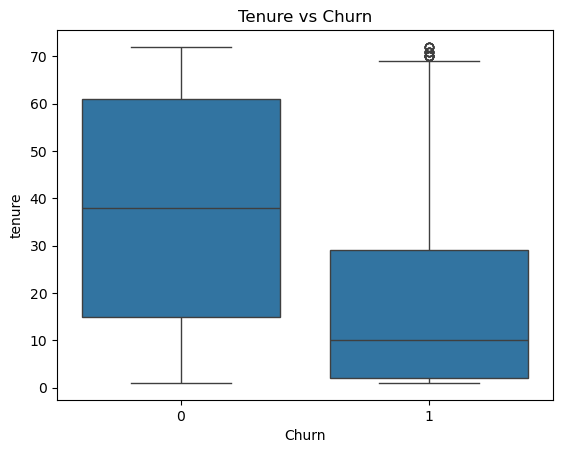

In [246]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

### Churn Rate by Contract Type

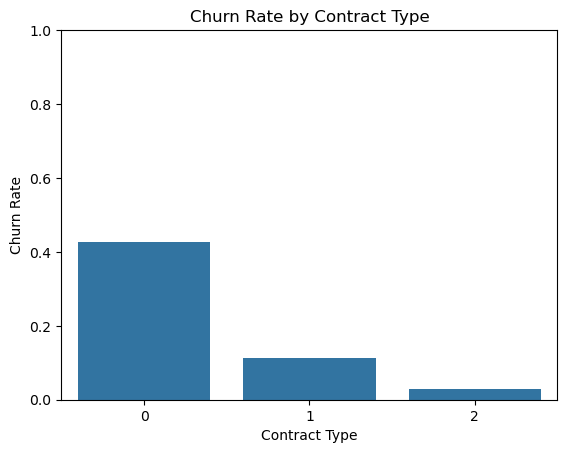

In [249]:
contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()

sns.barplot(x='Contract', y='Churn', data=contract_churn)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.ylim(0, 1)
plt.show()

## Univariate Analysis

### Distribution of Tenure

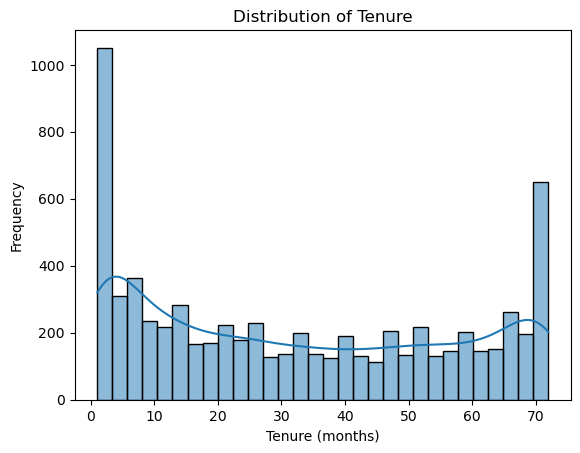

In [250]:
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

In [253]:
df[['tenure']].describe()

,tenure
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


### Report On Tenure

While most customers have been with the service for a few years, there is a significant portion of customers who are new or have short-term engagements with the service.

### Monthly Charges Distribution

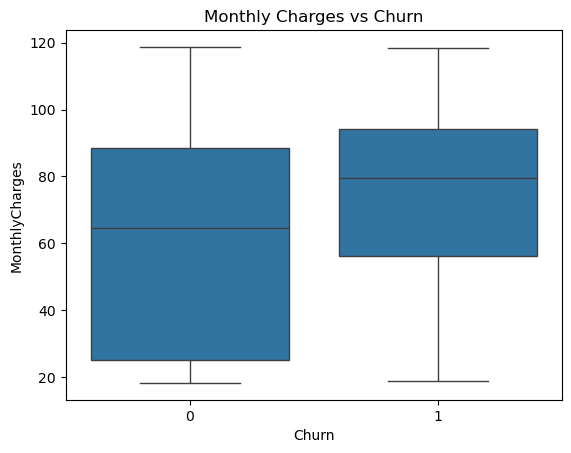

In [251]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

In [254]:
df[['MonthlyCharges']].describe()

,MonthlyCharges
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


### Report On Monthly Charges

Most customers are paying around $70, but there are still a fair number of customers paying lower or higher amounts.

## Display Target Variable

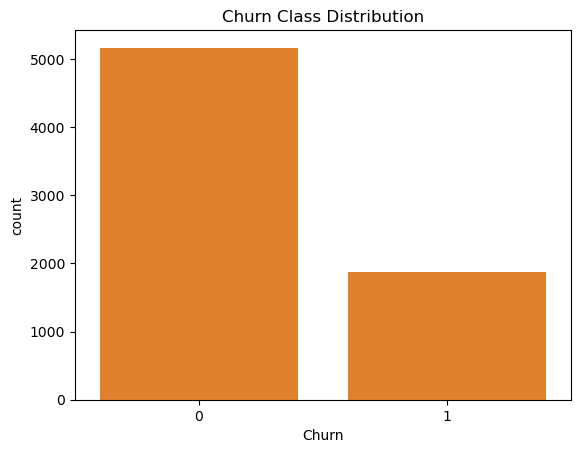

In [261]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Class Distribution')
plt.show()


In [279]:
yes_sum = df[df['Churn'] == 1].count()
print(f"total yes: {yes_sum}")
no_sum = df[df['Churn'] == 0].count()
print(f"total yes: {no_sum}")

total yes: Contract            1869
tenure              1869
OnlineSecurity      1869
TechSupport         1869
OnlineBackup        1869
SeniorCitizen       1869
PaperlessBilling    1869
MonthlyCharges      1869
InternetService     1869
Churn               1869
dtype: int64
total yes: Contract            5163
tenure              5163
OnlineSecurity      5163
TechSupport         5163
OnlineBackup        5163
SeniorCitizen       5163
PaperlessBilling    5163
MonthlyCharges      5163
InternetService     5163
Churn               5163
dtype: int64


## Report on Churn 

Imbalance between num of Yes and num of No, No's make up 73% of the dataset.

## Train-Test Split

In [268]:

# X: features, y: target
X = df.drop('Churn', axis=1) 
y = df['Churn']               

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (5625, 9)
Testing features shape: (1407, 9)


# Model Training

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
🔍 Confusion Matrix:
 [[1150  378]
 [ 163  419]]
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1528
           1       0.53      0.72      0.61       582

    accuracy                           0.74      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.78      0.74      0.75      2110



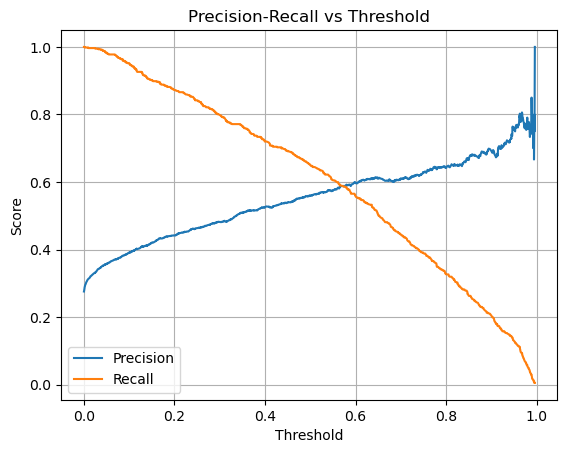

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#Grid Search for best hyperparameters
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(
    n_estimators=2000,
    max_depth=1000,
    class_weight='balanced',
    random_state=40,
    
)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

grid_search.fit(X_resampled, y_resampled)
print("Best Hyperparameters:", grid_search.best_params_)

# Predict probabilities on test set
best_model = grid_search.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]

# Adjust threshold
threshold = 0.4  # You can try different values: 0.3, 0.5, etc.
y_pred_custom = (y_proba >= threshold).astype(int)

# Evaluate the model
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("📊 Classification Report:\n", classification_report(y_test, y_pred_custom))

# Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Report


# Customer Churn Prediction – Model Evaluation Report

**Model**: Random Forest Classifier  
**Objective**: Predict customer churn for targeted retention  

---

## Dataset Summary

- **Total Observations**: 2110  
- **Target Variable**: `Churn` (Binary: 0 = Stayed, 1 = Churned)  
- **Imbalance Notice**:  
  - Class 0 (Stayed): 1528 (72%)  
  - Class 1 (Churned): 582 (28%)  
- **Resampling Strategy**: SMOTE applied on training set to handle class imbalance

---

## Model Configuration

### Algorithm

- **Type**: Random Forest Classifier  
- **Tuning Method**: GridSearchCV  
- **CV Folds**: 3  
- **Total Candidates Tested**: 36  
- **Total Fits**: 108  


## Model Evaluation

### Confusion Matrix

```
                Predicted
              |  No  | Yes
         -----|------|-----
        No    | 1150 | 378
        Yes   | 163  | 419
```

### Classification Report

| Class      | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
| **No**     | 0.88      | 0.75   | 0.81     | 1528    |
| **Yes**    | 0.53      | 0.72   | 0.61     | 582     |
| **Accuracy**              |       |        | **0.74** | 2110    |
| **Macro Avg**            | 0.70  | 0.74   | 0.71     |         |
| **Weighted Avg**         | 0.78  | 0.74   | 0.75     |         |

---

## Insights on Precision-Recall vs Threshold Graph

- **Recall (Churn class)**: 0.72 – the model correctly identified 72% of customers who churned.
- **Precision (Churn class)**: 0.53 – 53% of predicted churns were correct.
- **Overall Accuracy**: 74% – solid baseline for production consideration.
- **F1-Score**: Balanced metric of precision and recall suggests the model is robust, especially considering class imbalance.

# Precision-Recall vs Threshold Interpretation

## Left Side (Threshold ≈ 0)

- **Threshold is very low** → Model labels *almost everyone* as a positive (churner).
- **Recall is high (~1)**: It catches nearly all actual churners.
- **Precision is low**: Many false positives — customers wrongly predicted to churn.

---

## Right Side (Threshold ≈ 1)

- Model only predicts churn when it’s *very confident*.
- **Precision is high**: Very few false positives.
- **Recall drops close to 0**: Misses most of the actual churners.

---

## Intersection Point (~0.55)

- At this threshold, **Precision ≈ Recall**.
- Could be a strong candidate for balanced decision-making.
- Useful if you want to weigh precision and recall equally.

---


### If goal is **Retention** (catch as many churners as possible):
- Choose a **lower threshold** (e.g., **0.3–0.4**).
- **Maximize recall**.
- Catch more churners, but also risk flagging some non-churners.

### If goal is **Precision-focused** (target only likely churners):
- Choose a **higher threshold** (e.g., **0.6–0.7**).
- **Maximize precision**.
- Avoid false alarms, but may miss some true churners.





## Highlighting The Important Features In The Model

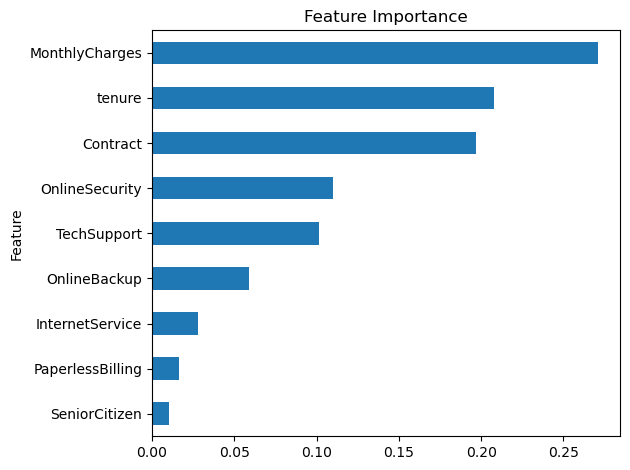

In [368]:
importances = best_model.feature_importances_
features = X.columns
df_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

df_imp.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Saving The Model For Use In Production

In [371]:

# Get current notebook directory
notebook_path = Path().resolve()
model_path = notebook_path.parent / "model" / 'churn_model.pkl'
joblib.dump(best_model, model_path)  


['C:\\Users\\tshep\\OneDrive\\Desktop\\MLG Projects\\MLG-381-Assignment-2\\model\\churn_model.pkl']